In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data/telco_customer_churn.csv')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.shape

(7043, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


# 1. Handle duplicates

In [8]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
#check for duplicates in each column and print the count of duplicates
for column in df.columns:
    duplicate_count = df[column].duplicated().sum()
    print(f"Column '{column}' has {duplicate_count} duplicates.")

Column 'CustomerID' has 0 duplicates.
Column 'Count' has 7042 duplicates.
Column 'Country' has 7042 duplicates.
Column 'State' has 7042 duplicates.
Column 'City' has 5914 duplicates.
Column 'Zip Code' has 5391 duplicates.
Column 'Lat Long' has 5391 duplicates.
Column 'Latitude' has 5391 duplicates.
Column 'Longitude' has 5392 duplicates.
Column 'Gender' has 7041 duplicates.
Column 'Senior Citizen' has 7041 duplicates.
Column 'Partner' has 7041 duplicates.
Column 'Dependents' has 7041 duplicates.
Column 'Tenure Months' has 6970 duplicates.
Column 'Phone Service' has 7041 duplicates.
Column 'Multiple Lines' has 7040 duplicates.
Column 'Internet Service' has 7040 duplicates.
Column 'Online Security' has 7040 duplicates.
Column 'Online Backup' has 7040 duplicates.
Column 'Device Protection' has 7040 duplicates.
Column 'Tech Support' has 7040 duplicates.
Column 'Streaming TV' has 7040 duplicates.
Column 'Streaming Movies' has 7040 duplicates.
Column 'Contract' has 7040 duplicates.
Column 'P

In [10]:
#check for duplicates by multiple columns
duplicate_rows = df[df.duplicated(subset=['Monthly Charges', 'Tenure Months', 'City', 'Gender'], keep=False)]

duplicate_rows.shape

(2, 33)

In [11]:
duplicate_rows.sort_values('Monthly Charges').head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1483,6424-ELEYH,1,United States,California,Lebec,93243,"34.845861, -118.885163",34.845861,-118.885163,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,229.5,Yes,1,65,3972,Attitude of service provider
2367,2800-VEQXM,1,United States,California,Lebec,93243,"34.845861, -118.885163",34.845861,-118.885163,Female,No,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,74.75,238.1,No,0,21,3319,NaN


The above two records seem to be different/indepent, therefore there are no duplicates found in this dataset.

# 2. Handle irrelevant data

In [12]:
#find columns where all values are the same-constant features
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: ['Count', 'Country', 'State']


In [13]:
#remove constant columns
df_no_constant_cols = df.drop(columns=constant_columns)

In [14]:
#columns with mostly missing values
threshold = 0  
print(f"total records: {df.shape[0]}")
for column in df.columns:
    missing_count = df[column].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column '{column}' has {missing_count} missing values ({missing_ratio:.2f}%)")

total records: 7043
Column 'Churn Reason' has 5174 missing values (73.46%)


the column "churn reason" has not been removed because those 5174 missing values represent customers who did not churn.

# 3. Handle missing values

In [15]:
#display dataframe with missing values
df_missing = df[df.isnull().any(axis=1)]
df_missing.shape

(5174, 33)

In [16]:
df_missing.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [17]:
#identify numerical columns and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')
Categorical columns: Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Label', 'Churn Reason'],
      dtype='object')


In [18]:
#get the list of columns with missing values for numerical columns
missing_numerical_cols = df[numerical_cols].isnull().any()
missing_numerical_cols = missing_numerical_cols[missing_numerical_cols].index
print("Numerical columns with missing values:", missing_numerical_cols.tolist())

Numerical columns with missing values: []


In [19]:
#get the list of columns with missing values for categorical columns
missing_categorical_cols = df[categorical_cols].isnull().any()
print(missing_categorical_cols)
missing_categorical_cols = missing_categorical_cols[missing_categorical_cols].index
print("Categorical columns with missing values:", missing_categorical_cols.tolist())

CustomerID           False
Country              False
State                False
City                 False
Lat Long             False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Total Charges        False
Churn Label          False
Churn Reason          True
dtype: bool
Categorical columns with missing values: ['Churn Reason']


not dropping the rows with missing values in the 'Churn Reason' because those rows actually represent the customers who did not churn

In [20]:
#fill missing values in the 'Churn Reason' column with 'nochurn'
df_filled = df.copy()
df_filled['Churn Reason'] = df_filled['Churn Reason'].fillna('nochurn')

In [21]:
#check if there are still any missing values in the 'Churn Reason' column
missing_churn_reason = df_filled['Churn Reason'].isnull().any()
print("Are there any missing values in 'Churn Reason' after filling?:", missing_churn_reason)

Are there any missing values in 'Churn Reason' after filling?: False


In [22]:
#the number of rows of column 'Churn Reason' with value 'nochurn' should equal the number of rows with missing values in 'Churn Reason'
nochurn_count = df_filled['Churn Reason'].value_counts().get('nochurn', 0)
missing_churn_count = df['Churn Reason'].isnull().sum()
print(f"Number of 'nochurn' in 'Churn Reason': {nochurn_count}, Number of missing values in 'Churn Reason': {missing_churn_count}")

Number of 'nochurn' in 'Churn Reason': 5174, Number of missing values in 'Churn Reason': 5174


# 4. Handle outliers

In [23]:
#find outliers using IQR method, remove points outside Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
def find_outliers_IQR_method(input_df, variable):
    Q1 = input_df[variable].quantile(0.25)
    Q3 = input_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [24]:
#find lower and upper limits for target
feature = 'Churn Score'
lower, upper = find_outliers_IQR_method(df, feature)
print(f"Lower limit for {feature}: {lower}, Upper limit for {feature}: {upper}")

Lower limit for Churn Score: -12.5, Upper limit for Churn Score: 127.5


In [25]:
#remove outliers using the IQR method
df_cleaned = df[(df[feature] > lower) & (df[feature] < upper)]

print(f"Cleaned dataset : {df_cleaned.shape}")
print(f"outliers count : {len(df) - len(df_cleaned)}")

Cleaned dataset : (7043, 33)
outliers count : 0


((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([  5,   7,   7, ..., 100, 100, 100], dtype=int64)),
 (21.193934791449404, 58.69941786170666, 0.984200360587014))

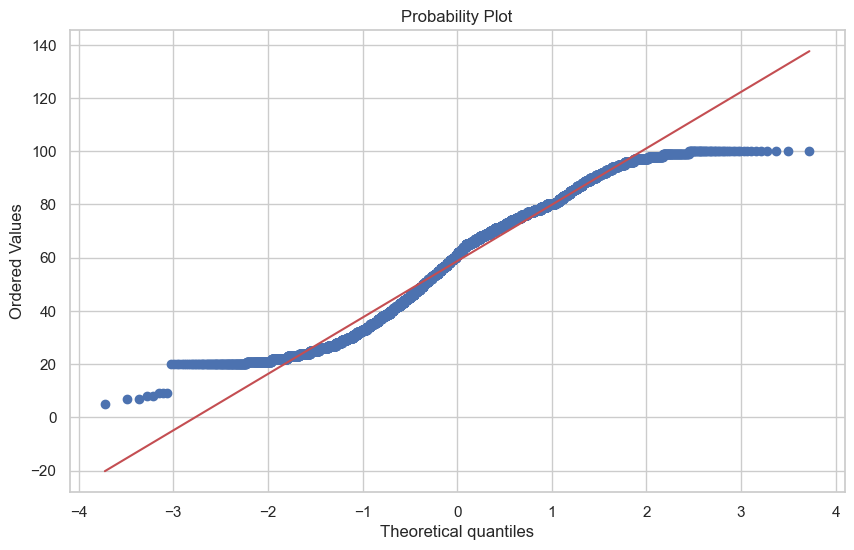

In [26]:
#probability plot for the 'Churn Score' feature - there was no outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
stats.probplot(df[feature], plot=plt)

In [27]:
#find outliers using Z-score method
def find_outliers_z_score(input_df, variable):
    df_z_scores = input_df.copy()

    z_scores = np.abs(stats.zscore(df_z_scores[variable]))

    df_z_scores[variable + '_Zscore'] = z_scores
    return df_z_scores


In [28]:
#find outliers using Z-score method
df_z_scores = find_outliers_z_score(df.copy(), feature)
df_z_scores.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Score_Zscore
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1.268402
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0.385650
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,1.268402
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,1.175481
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,1.407784


In [29]:
#remove outliers using z-score method, data points with Z-score greater than 3 are considered outliers
df_z_scores_cleaned = df_z_scores[df_z_scores[feature + '_Zscore'] < 3]

print(f"Cleaned dataset using Z-score method: {df_z_scores_cleaned.shape}")
print(f"outliers count using Z-score method: {len(df_z_scores) - len(df_z_scores_cleaned)}")

Cleaned dataset using Z-score method: (7043, 34)
outliers count using Z-score method: 0


# Pandas profile report

In [30]:
from ydata_profiling import ProfileReport

c:\Users\jllen\anaconda3\envs\comp647\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
profile = ProfileReport(df, title="Telco Customer Churn Data Profile Report")
profile.to_file("telco_customer_churn_profile_report.html")
profile.to_file("telco_customer_churn_profile_report.json")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 51.66it/s]


# 5. EDA - Exploratory Data Analysis

KeyError: 'Churn Label'

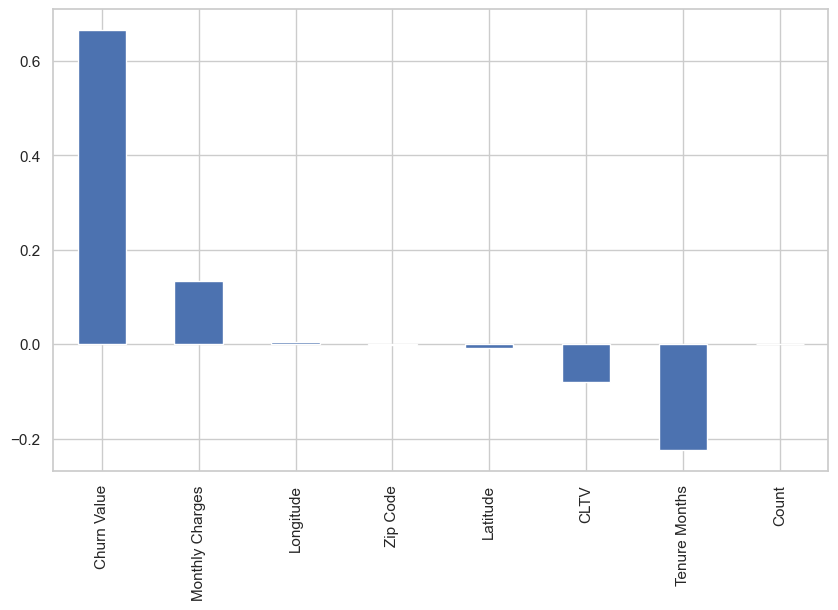

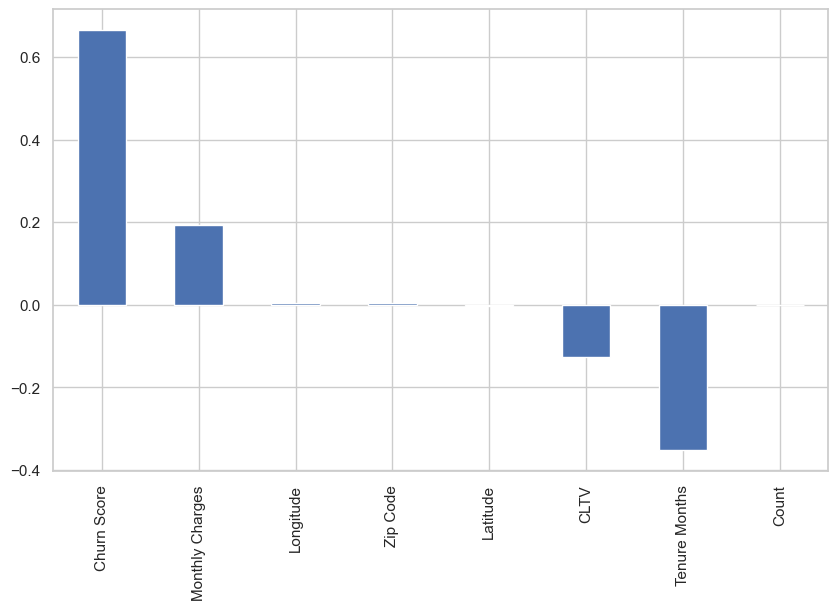

<Figure size 1000x600 with 0 Axes>

In [ ]:
#bar plot of correlation between 'Churn Score' and numerical columns
plt.figure(figsize=(10, 6))
df[numerical_cols].corr()['Churn Score'].drop('Churn Score').sort_values(ascending=False).plot(kind='bar')

#bar plot of correlation between 'Churn Value' and numerical columns
plt.figure(figsize=(10, 6))
df[numerical_cols].corr()['Churn Value'].drop('Churn Value').sort_values(ascending=False).plot(kind='bar')

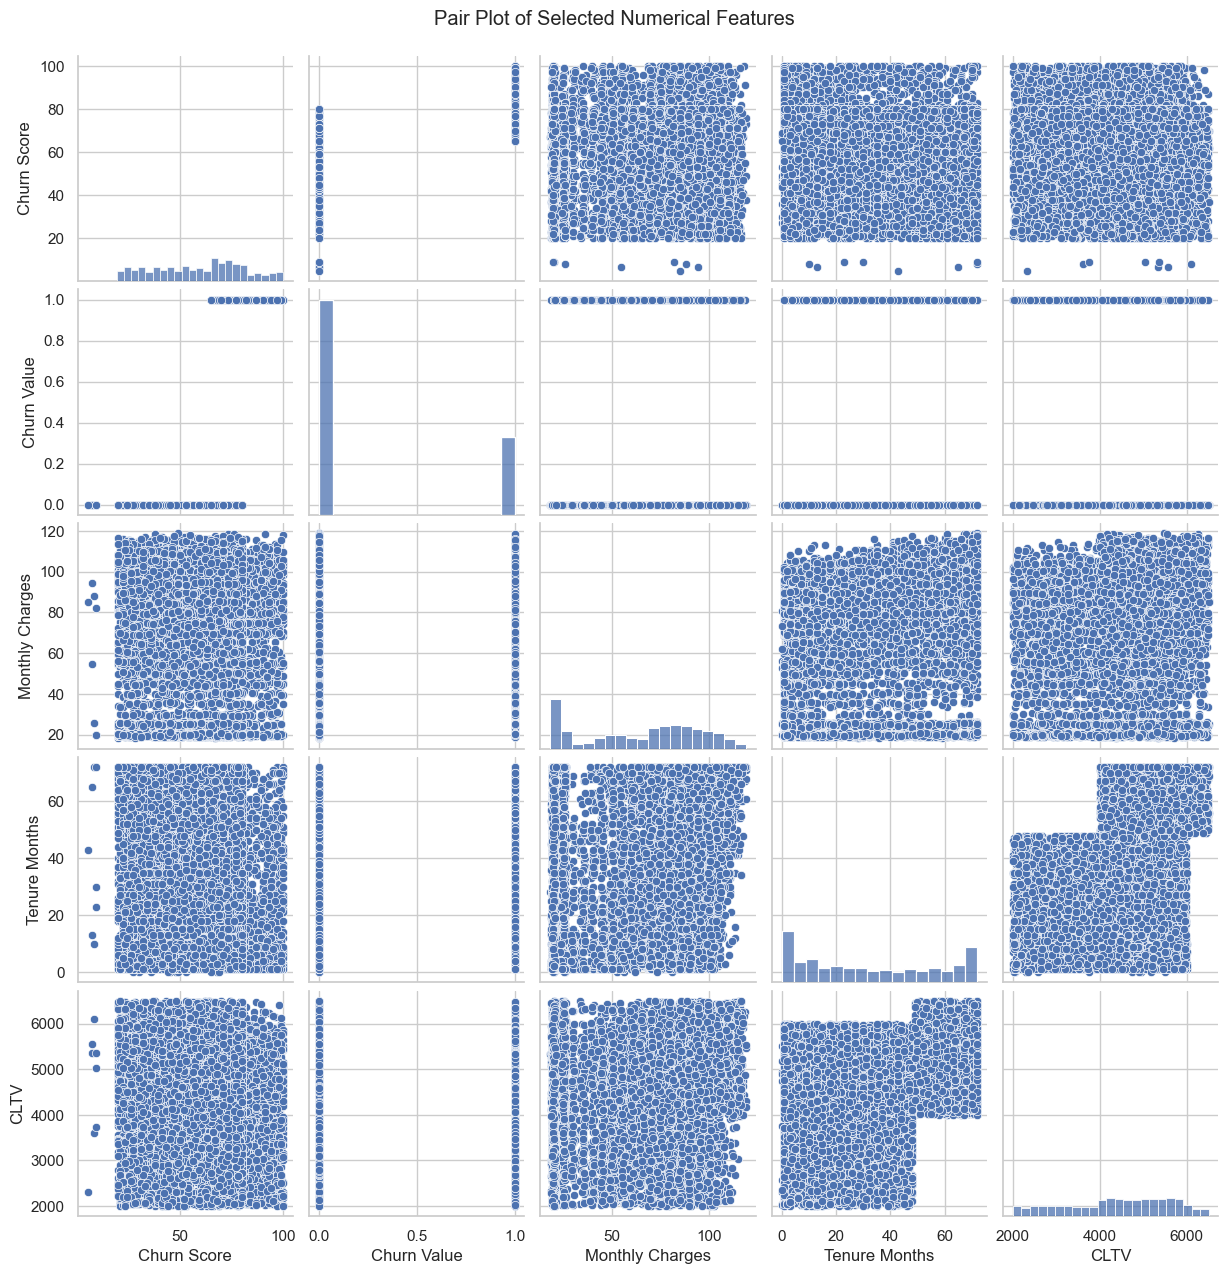

In [ ]:
#pair plot of numerical columns
pair_plot = sns.pairplot(df[['Churn Score', 'Churn Value', 'Monthly Charges', 'Tenure Months', 'CLTV']])
pair_plot.fig.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

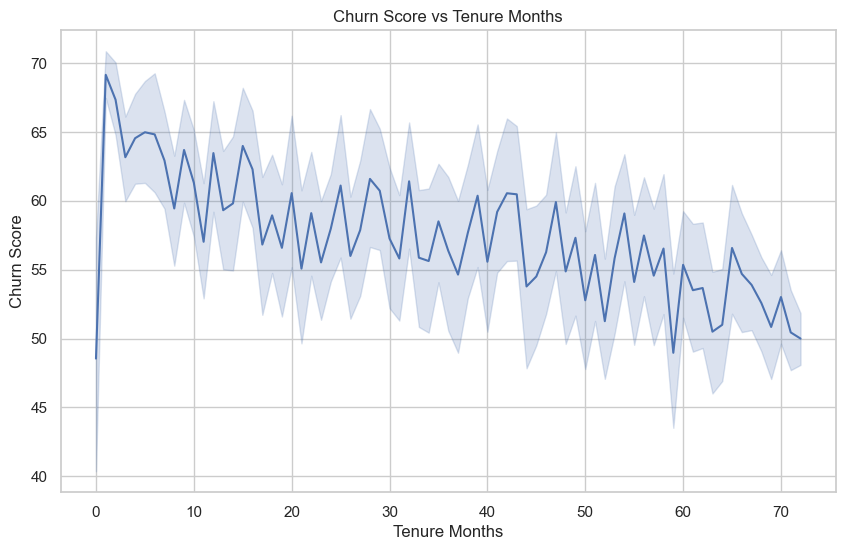

In [ ]:
#line plot of 'Churn Score' vs 'Tenure Months'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Tenure Months', y='Churn Score')
plt.title('Churn Score vs Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.show()

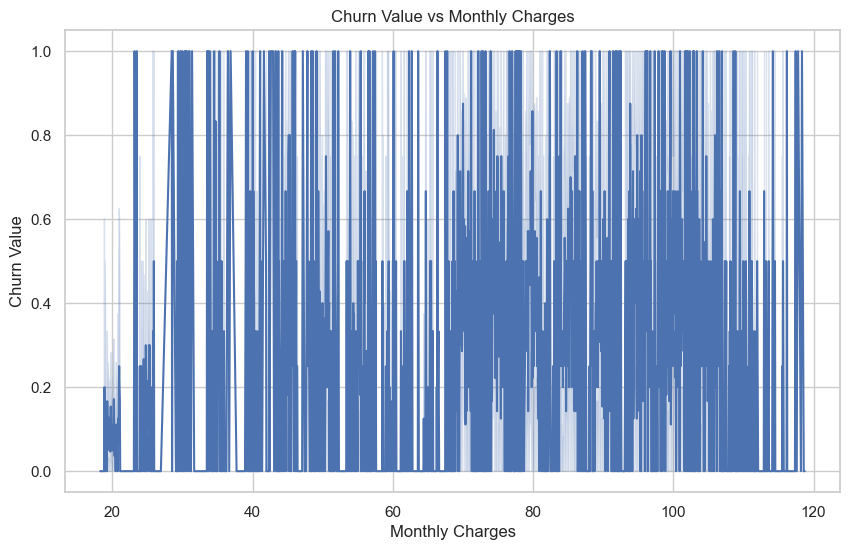

In [ ]:
#line plot of 'Churn Value' vs 'Monthly Charges'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Monthly Charges', y='Churn Value')
plt.title('Churn Value vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Value')
plt.show()

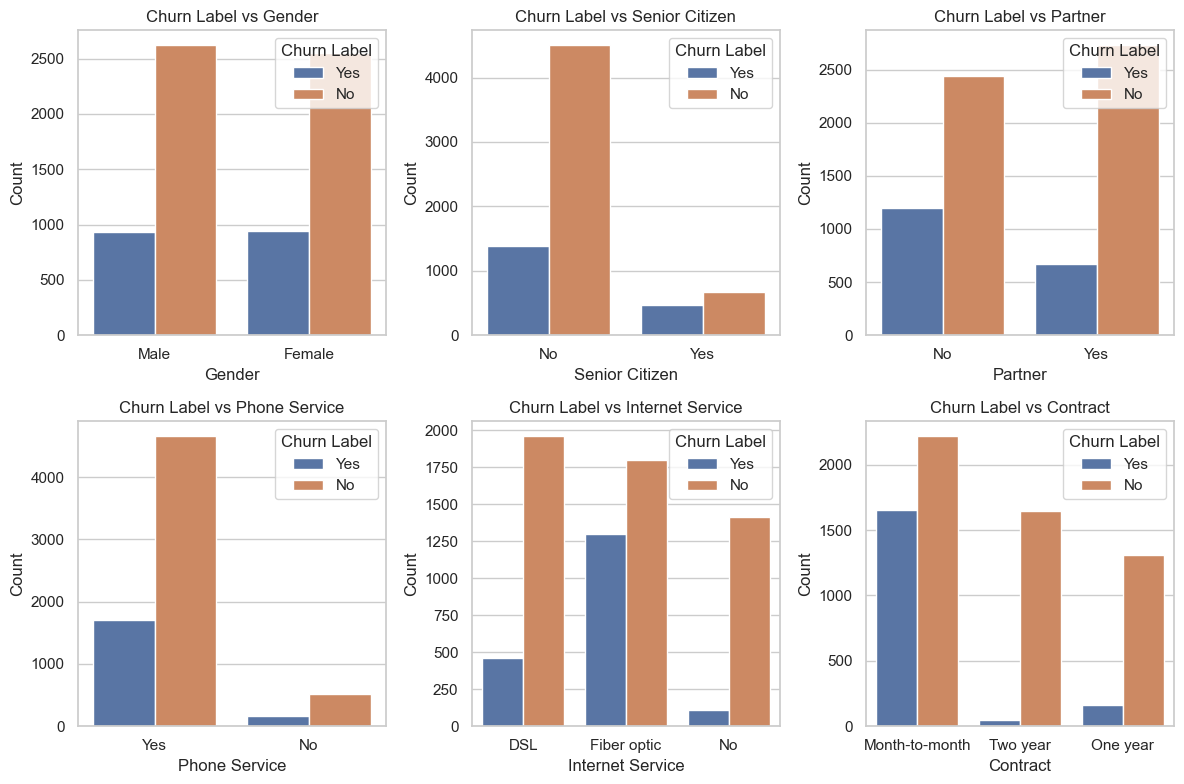

In [36]:
#to visualise the relationship between 'Churn Label' and other categorical columns including 'Gender', 'Senior Citizen', 'Partner', 'Phone Service', 'Internet Service', 'Contract'
plt.figure(figsize=(12, 8))
cat_cols = ['Gender', 'Senior Citizen', 'Partner', 'Phone Service', 'Internet Service', 'Contract']
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn Label')
    plt.title(f'Churn Label vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn Label')
plt.tight_layout()
plt.show()